# Bellabeat Fitness Data Case Study

### By: Julia Farson

In [2]:
![Bellabeat](Bellabeat.png)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:2: unexpected '['
1: ![
     ^


# 1. Introduction

### About Bellabeat

Bellabeat is a high-tech manufacturer of health-focused products for women. Bellabeat products collect data on the user's sleep, stress, activity, and reproductive health to empower women with knowledge on their own health and wellness. Bellabeat's co-founders, Urška Sršen and Sando Mur, would like to analyze daily habits of consumers of other smart devices in order to identify trends and guide Bellabeat marketing strategies. 

### Business task
Analyzing smart device data trends in order to make high level recommendations to guide Bellabeat marketing strategies.

### Key stakeholders:
Cofounders Urška Sršen, Sando Mur, and the rest of the Bellabeat marketing team.

# 2. Data Prep / Preprocessing

## Key Objectives:

### Determining credibility of the data
Sršen has asked for data from FitBit Fitness Tracker to be analyzed. The data provided is open source data from Fitbit Fitness Tracker. The data is stored in Kaggle and made available by Mobius. The data sets were created from a survey provided by Amazon Mechanical Turk. The survey included thirty FitBit users' personal tracking data over the course of two months between 03.12.2016 and 05.12.2016.

Limitations to this data include the limited sample size and lack of demographic information indicating that the sample may not be an accurate representation of FitBit users as whole. The dataset is also outdated. If Bellabeat was a real client, I would explain the limitations with the data set provided and suggest alternative, more reliable data. Since the case study asks for the Fitbit Fitness Tracker data to be analyzed, I continued my analysis with the data provided. 

### Sorting and filtering the data
To sort and filter the data, I began by installing and downloading the tidyverse and lubridate package in order to upload the csv files and view the data sets containing the Fitbit Fitness Tracker data. I also installed packages I would need for the data cleaning and visualization process.

In [56]:
install.packages("tidyverse")
library(tidyverse)
install.packages("lubridate")
library(lubridate)
install.packages("dplyr")
library(dplyr)
install.packages("ggplot2")
library(ggplot2)
install.packages("tidyr")
library(tidyr)
install.packages("skimr")
library(skimr)
install.packages("janitor")
library(janitor)
install.packages("here")
library(here)
install.packages("ggpubr")
library(ggpubr)
install.packages("ggrepel")
library(ggrepel)

Warning message:
"package 'tidyverse' is in use and will not be installed"
Warning message:
"package 'lubridate' is in use and will not be installed"
Warning message:
"package 'dplyr' is in use and will not be installed"
Warning message:
"package 'ggplot2' is in use and will not be installed"
Warning message:
"package 'tidyr' is in use and will not be installed"
Warning message:
"package 'skimr' is in use and will not be installed"
Warning message:
"package 'janitor' is in use and will not be installed"
Warning message:
"package 'here' is in use and will not be installed"
Warning message:
"package 'ggpubr' is in use and will not be installed"
Warning message:
"package 'ggrepel' is in use and will not be installed"


Next, I uploaded the data sets using the read.csv function through the tidyverse package.

In [57]:
activity <- read.csv("dailyActivity_merged.csv")
intensity <- read.csv("hourlyIntensities_merged.csv")
calories <- read.csv("hourlyCalories_merged.csv")
sleep <- read.csv("sleepDay_merged.csv")
weight <- read.csv("weightLogInfo_merged.csv")

After uploading the data, I previewed my data frames to review the summary of each column through the head function.

In [58]:
head(activity)
head(intensity)
head(calories)
head(sleep)
head(weight)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


# 3. Processing Data

## Key Objectives:
* Checking data for errors
*  Documenting cleaning process

I started my data cleaning process by checking the amount of users per data frame. 

In [59]:
n_distinct(activity$Id)
n_distinct(intensity$Id)
n_distinct(calories$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

The data frames "activity", "intensity", and "calories" contained 33 users. The data frame "sleep" contained 24 users. The data frame "weight" only contained 8 users which is not a sufficient enough sample size to make decisions based on this data.


Next I checked for duplicate values using the sum and duplicated function to count the amount of duplicate values in each data frame.

In [60]:
sum(duplicated(activity))
sum(duplicated(intensity))
sum(duplicated(calories))
sum(duplicated(sleep))

[1] 0

[1] 0

[1] 0

[1] 3

The results showed that the "sleep" data frame contained 3 duplicate entries. 

Next I checked for null values in each data frame.

In [61]:
colSums(is.na(activity))
colSums(is.na(intensity))
colSums(is.na(calories))
colSums(is.na(sleep))

Id             ActivityDate               TotalSteps 
                       0                        0                        0 
           TotalDistance          TrackerDistance LoggedActivitiesDistance 
                       0                        0                        0 
      VeryActiveDistance ModeratelyActiveDistance      LightActiveDistance 
                       0                        0                        0 
 SedentaryActiveDistance        VeryActiveMinutes      FairlyActiveMinutes 
                       0                        0                        0 
    LightlyActiveMinutes         SedentaryMinutes                 Calories 
                       0                        0                        0

Id     ActivityHour   TotalIntensity AverageIntensity 
               0                0                0                0

Id ActivityHour     Calories 
           0            0            0

Id           SleepDay  TotalSleepRecords TotalMinutesAsleep 
                 0                  0                  0                  0 
    TotalTimeInBed 
                 0

The results showed that there were no null values in the data frames. I removed the duplicates found in the "sleep" data frame.

In [62]:
sleep <- sleep %>% 
  distinct()

I double checked that the duplicate values were removed. 

In [63]:
sum(duplicated(sleep))

[1] 0

Next, I checked the column names to ensure proper and consistent formatting which will be important when merging data frames.

In [64]:
clean_names(activity)
clean_names(intensity)
clean_names(calories)
clean_names(sleep)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


id,activity_hour,total_intensity,average_intensity
<dbl>,<chr>,<int>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000
1503960366,4/12/2016 6:00:00 AM,0,0.000000
1503960366,4/12/2016 7:00:00 AM,0,0.000000
1503960366,4/12/2016 8:00:00 AM,13,0.216667


id,activity_hour,calories
<dbl>,<chr>,<int>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48
1503960366,4/12/2016 6:00:00 AM,48
1503960366,4/12/2016 7:00:00 AM,47
1503960366,4/12/2016 8:00:00 AM,68


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<int>,<int>,<int>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


I also cleaned the date-time formatting within the data frames.

In [65]:
activity$ActivityDate=as.POSIXct(activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
activity$date <- format(activity$ActivityDate, format = "%m/%d/%y")

In [66]:
head(activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,04/12/16
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,04/13/16
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,04/14/16
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,04/15/16
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,04/16/16
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,04/17/16


In [67]:
sleep$SleepDay=as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y")

In [68]:
head(sleep)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date
,<dbl>,<dttm>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,1,327,346,04/12/16
2,1503960366,2016-04-13,2,384,407,04/13/16
3,1503960366,2016-04-15,1,412,442,04/15/16
4,1503960366,2016-04-16,2,340,367,04/16/16
5,1503960366,2016-04-17,1,700,712,04/17/16
6,1503960366,2016-04-19,1,304,320,04/19/16


In [69]:
intensity$ActivityHour=as.POSIXct(intensity$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
intensity$time <- format(intensity$ActivityHour, format = "%H:%M:%S")
intensity$date <- format(intensity$ActivityHour, format = "%m/%d/%y")
head(intensity)

,Id,ActivityHour,TotalIntensity,AverageIntensity,time,date
,<dbl>,<dttm>,<int>,<dbl>,<chr>,<chr>
1,1503960366,2016-04-12 00:00:00,20,0.333333,00:00:00,04/12/16
2,1503960366,2016-04-12 01:00:00,8,0.133333,01:00:00,04/12/16
3,1503960366,2016-04-12 02:00:00,7,0.116667,02:00:00,04/12/16
4,1503960366,2016-04-12 03:00:00,0,0.000000,03:00:00,04/12/16
5,1503960366,2016-04-12 04:00:00,0,0.000000,04:00:00,04/12/16
6,1503960366,2016-04-12 05:00:00,0,0.000000,05:00:00,04/12/16


In [70]:
calories$ActivityHour=as.POSIXct(calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
calories$time <- format(calories$ActivityHour, format = "%H:%M:%S")
calories$date <- format(calories$ActivityHour, format = "%m/%d/%y")
head(calories)

,Id,ActivityHour,Calories,time,date
,<dbl>,<dttm>,<int>,<chr>,<chr>
1,1503960366,2016-04-12 00:00:00,81,00:00:00,04/12/16
2,1503960366,2016-04-12 01:00:00,61,01:00:00,04/12/16
3,1503960366,2016-04-12 02:00:00,59,02:00:00,04/12/16
4,1503960366,2016-04-12 03:00:00,47,03:00:00,04/12/16
5,1503960366,2016-04-12 04:00:00,48,04:00:00,04/12/16
6,1503960366,2016-04-12 05:00:00,48,05:00:00,04/12/16


# 4. Exploratory Data Analysis and Visualization

### Key Objectives:
* Identifying trends and relationships
* Performing calculations
* Creating compelling visuals 

After I finished cleaning the data, I analyzed the data frames through the select and summary functions to identify trends.

In [71]:
activity %>% 
  select(TotalSteps, TotalDistance, Calories) %>% 
  summary()

   TotalSteps    TotalDistance       Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :4900  

Observations from this summary:

- The average amount of steps per day was 7,638 steps. According to the CDC, adults should aim to take between 8,000-12,000 steps a day. The CDC found that taking 8,000 steps per day was associated with a 51% lower risk for death from all causes compared to 4,000 steps. Taking 12,000 steps compared to 4,000 per day was associated with a 65% lower risk. 

In [72]:
activity %>% 
  select(VeryActiveMinutes,FairlyActiveMinutes,SedentaryMinutes) %>% 
  summary()

 VeryActiveMinutes FairlyActiveMinutes SedentaryMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :   0.0  
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.: 729.8  
 Median :  4.00    Median :  6.00      Median :1057.5  
 Mean   : 21.16    Mean   : 13.56      Mean   : 991.2  
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:1229.5  
 Max.   :210.00    Max.   :143.00      Max.   :1440.0  

Observations from this summary:

- The average amount of sedentary minutes a day was 991.2 minutes (17 hours). The average amount of very active and fairly active minutes a day are both under the CDC guidelines of 60 minutes of activity a day.

In [73]:
sleep %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8  
 Median :1.00      Median :432.5      Median :463.0  
 Mean   :1.12      Mean   :419.2      Mean   :458.5  
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.00      Max.   :796.0      Max.   :961.0  

Observations from this summary:

- The average total time asleep is 419.2 minutes (7 hours). Most users are getting the recommended amount of sleep of 7 hours or more per the CDC guidelines.

I merged the "sleep" data into my "activity" data frame. 

In [74]:
merged_data <- merge(sleep, activity, by=c('Id', 'date'))
head(merged_data)

,Id,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<dttm>,<int>,<int>,<int>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/16,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,04/13/16,2016-04-13,2,384,407,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,04/15/16,2016-04-15,1,412,442,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,04/16/16,2016-04-16,2,340,367,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
5,1503960366,04/17/16,2016-04-17,1,700,712,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,04/19/16,2016-04-19,1,304,320,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035


Next I began the visualization process. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



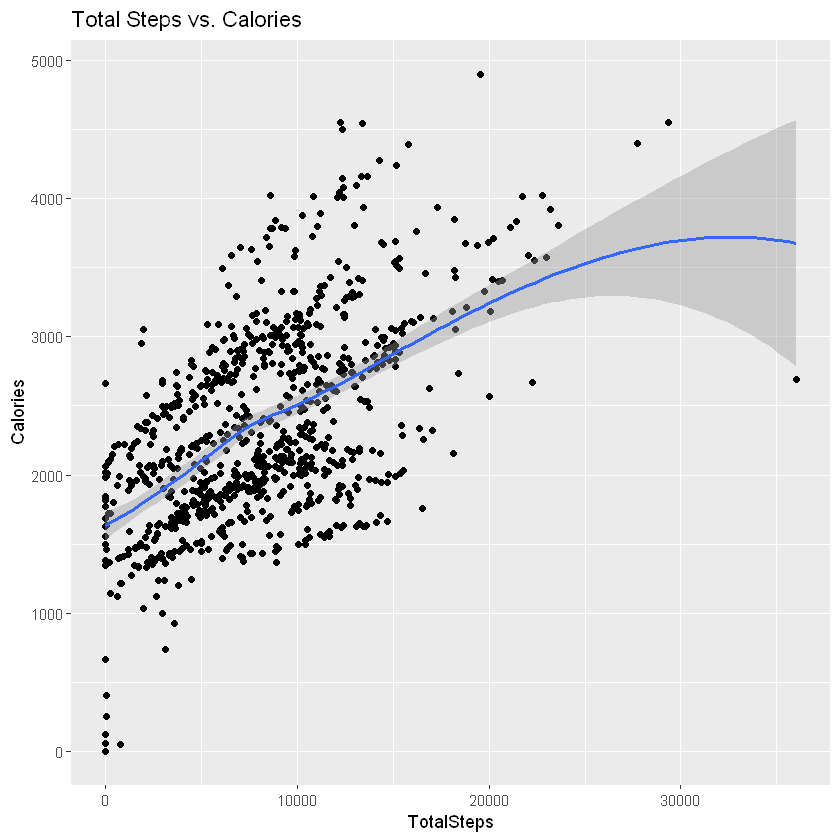

In [75]:
ggplot(data=activity, aes(x=TotalSteps, y=Calories)) + 
  geom_point() + geom_smooth() + labs(title="Total Steps vs. Calories")

The visual above shows a positive correlation between number of steps and calories burned as expected. The more steps users took, the more calories they burned.  

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



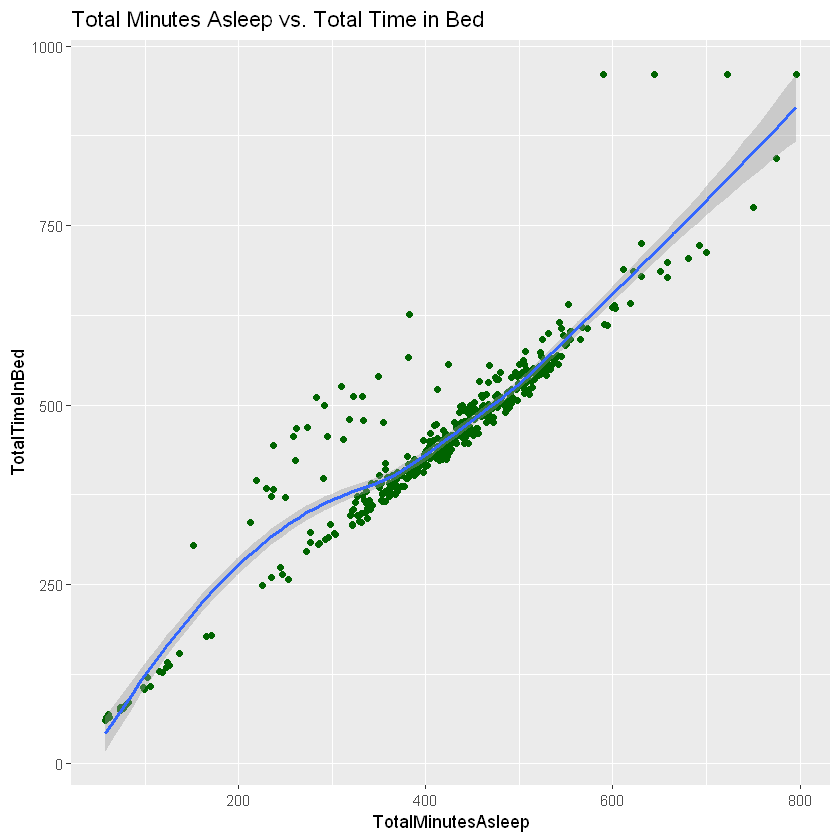

In [76]:
ggplot(data=sleep, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + geom_point(color='dark green') +geom_smooth() + labs(title="Total Minutes Asleep vs. Total Time in Bed")

This visual also shows a positive correlation between time spent in bed and total minutes asleep. FitBit users who spent more time in bed also spent more time asleep. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



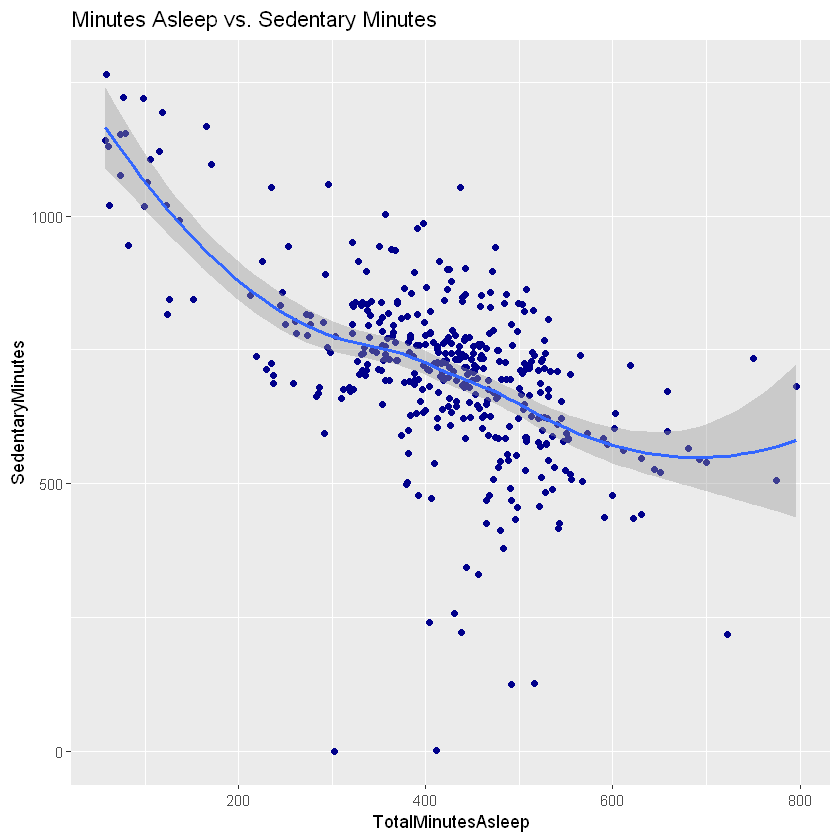

In [77]:
ggplot(data=merged_data, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) + 
geom_point(color='darkblue') + geom_smooth() +
  labs(title="Minutes Asleep vs. Sedentary Minutes")

This visual shows a negative correlation between sedentary minutes and minutes asleep. Fitbit users had more sedentary minutes a day slept less at night. 

In [78]:
int_new <- intensity %>%
  dplyr::group_by(time) %>%
  drop_na() %>%
  dplyr::summarise(mean_total_int = mean(TotalIntensity))

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"


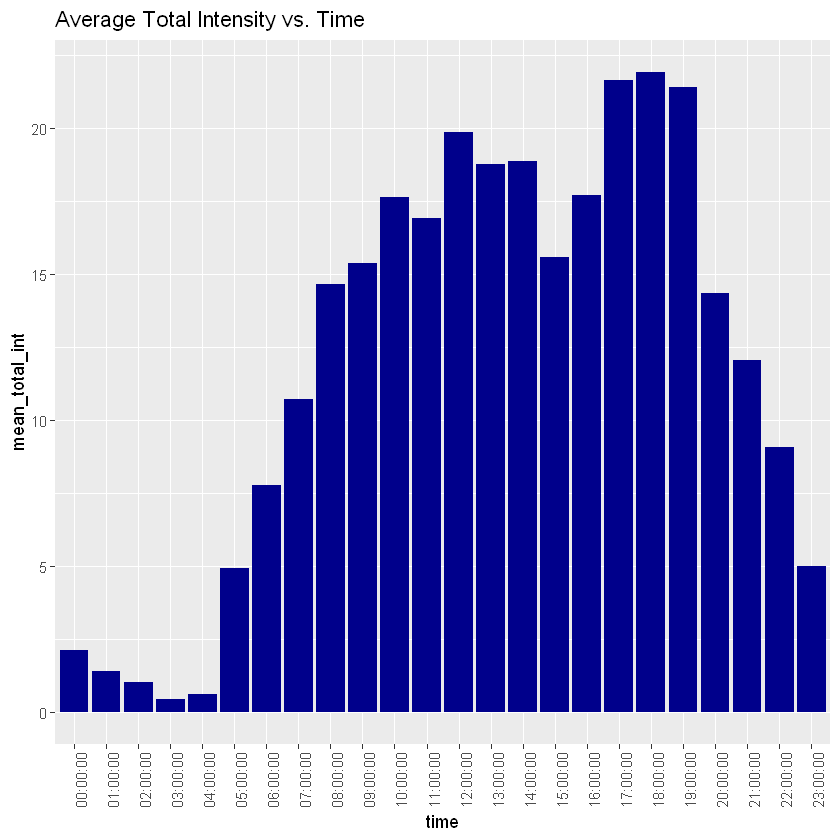

In [79]:
ggplot(data=int_new, aes(x=time, y=mean_total_int)) + geom_histogram(stat = "identity", fill='darkblue') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Intensity vs. Time")

The visual above shows that FitBit users were most active between 5 and 7 pm. Based on this visual, we can assume that FitBit users are most likely exercising after they get off work.

# 5. Conclusion 

In [80]:
![Run](run.jfif)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:2: unexpected '['
1: ![
     ^


## Key Objectives:

* Final conclusion based on insights
* Applying insights to marketing strategy 

### Recommendations for the Business

After analyzing the FitBit Fitness Tracker Data, I found some insights that would help influence Bellabeat marketing strategy.

Bellabeat's target audience should be women wanting to perfect their work/life balance to improve their health. Based on my analysis, most users are sedentary an average of 17 hours a day and exercise between 5 pm and 7 pm. This indicates the average user most likely has an office job. 

Ideas to improve the Bellabeat App:

* Notifications to increase daily step count. Most users are not reaching the recommended step count of at least 8,000 steps a day. Reminders to increase daily step count can help users reach the daily recommmended goal. Adding in information on health benefits of reaching the daily step goal could also help motivate users to increase their step count as well.

* Since most activities happen between 5 - 7 pm, notifications to remember to reach the recommended 60 minutes of exercise a day would be beneficial around this time to remind users to exercise once they get off work. 

* Notifications to go to sleep and set a bed time would also benefit Bellabeat users as increased time in bed correlated with increased time asleep. It could also be beneficial to offer techniques and tips to wind down in order to improve the user's quality of sleep. 

* A weekly summary of sleep quality, step count, activity level, and calories burned would also be beneficial to help users identify weekly habits in order to better reach their health goals. 

# Thank you for reading my notebook!!!

### Regards,

### Julia Farson